# New Customer List

In [1]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

from datetime import datetime, date
plt.style.use('ggplot')

In [2]:
new_cust = pd.read_excel(r"C:\Users\ASUS\Documents\Prwatech Project work\Customer_Retail_Transaction_Dataset.xlsx" , sheet_name='NewCustomerList')
new_cust.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,state,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,...,QLD,Australia,6,0.95,1.1875,1.484375,1.261719,1,1,1.718750
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,...,NSW,Australia,11,1.02,1.0200,1.275000,1.083750,1,1,1.718750
2,Ardelis,Forrester,Female,10,1974-08-28 00:00:00,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,...,VIC,Australia,5,0.73,0.7300,0.730000,0.730000,1,1,1.718750
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,...,QLD,Australia,1,1.00,1.2500,1.250000,1.250000,4,4,1.703125
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,...,NSW,Australia,9,1.00,1.0000,1.250000,1.250000,4,4,1.703125


In [3]:
new_cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   first_name                           1000 non-null   object 
 1   last_name                            971 non-null    object 
 2   gender                               1000 non-null   object 
 3   past_3_years_bike_related_purchases  1000 non-null   int64  
 4   DOB                                  983 non-null    object 
 5   job_title                            894 non-null    object 
 6   job_industry_category                835 non-null    object 
 7   wealth_segment                       1000 non-null   object 
 8   deceased_indicator                   1000 non-null   object 
 9   owns_car                             1000 non-null   object 
 10  tenure                               1000 non-null   int64  
 11  address                        

The data-types of the feature columns are fine. However 'Unnamed: 16','Unnamed: 17','Unnamed: 18','Unnamed: 19','Unnamed: 20' are irrelevent column. Hence it should be dropped.

In [4]:
# Total Records

In [5]:
print("Total records (rows) in the dataset : {}".format(new_cust.shape[0]))
print("Total columns (features) in the dataset : {}".format(new_cust.shape[1]))

Total records (rows) in the dataset : 1000
Total columns (features) in the dataset : 23


In [6]:
# Numeric Columns and Non-Numeric Columns

In [7]:
# select numeric columns
df_numeric = new_cust.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values
print("The numeric columns are :")
print(numeric_cols)


# select non-numeric columns
df_non_numeric = new_cust.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values
print("The non-numeric columns are :")
print(non_numeric_cols)

The numeric columns are :
['past_3_years_bike_related_purchases' 'tenure' 'postcode'
 'property_valuation' 'Unnamed: 16' 'Unnamed: 17' 'Unnamed: 18'
 'Unnamed: 19' 'Unnamed: 20' 'Rank' 'Value']
The non-numeric columns are :
['first_name' 'last_name' 'gender' 'DOB' 'job_title'
 'job_industry_category' 'wealth_segment' 'deceased_indicator' 'owns_car'
 'address' 'state' 'country']


In [8]:
# Dropping Irrelevent Columns

In [9]:
new_cust.drop(labels=['Unnamed: 16','Unnamed: 17','Unnamed: 18','Unnamed: 19','Unnamed: 20'], axis=1 , inplace=True)

In [10]:
new_cust.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,14,45 Shopko Center,4500,QLD,Australia,6,1,1.718750
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,16,14 Mccormick Park,2113,NSW,Australia,11,1,1.718750
2,Ardelis,Forrester,Female,10,1974-08-28 00:00:00,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,10,5 Colorado Crossing,3505,VIC,Australia,5,1,1.718750
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,5,207 Annamark Plaza,4814,QLD,Australia,1,4,1.703125
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,19,115 Montana Place,2093,NSW,Australia,9,4,1.703125


In [11]:
#  Missing Values Check

Checking for the presence of any missing values in the dataset. If missing values are present for a particular feature then depending upon the situation the feature may be either dropped (cases when a major amount of data is missing) or an appropiate value will be imputed in the feature column with missing values.

In [12]:
# Total number of missing values
new_cust.isnull().sum()

first_name                               0
last_name                               29
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     17
job_title                              106
job_industry_category                  165
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                   0
address                                  0
postcode                                 0
state                                    0
country                                  0
property_valuation                       0
Rank                                     0
Value                                    0
dtype: int64

In [13]:
# Percentage of missing values
new_cust.isnull().mean()*100

first_name                              0.0
last_name                               2.9
gender                                  0.0
past_3_years_bike_related_purchases     0.0
DOB                                     1.7
job_title                              10.6
job_industry_category                  16.5
wealth_segment                          0.0
deceased_indicator                      0.0
owns_car                                0.0
tenure                                  0.0
address                                 0.0
postcode                                0.0
state                                   0.0
country                                 0.0
property_valuation                      0.0
Rank                                    0.0
Value                                   0.0
dtype: float64

In [14]:
# Last Name

Since All customers have a First name, all the customers are identifiable. Hence it is okay for to not have a last name. Filling null last names with "None"

In [15]:
new_cust[new_cust['last_name'].isnull()][['first_name']].isnull().sum()

first_name    0
dtype: int64

In [16]:
new_cust[new_cust['last_name'].isnull()].head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value
12,Olag,NaN,Male,60,1990-05-13,Human Resources Manager,Telecommunications,Mass Customer,N,No,9,0484 North Avenue,2032,NSW,Australia,11,13,1.609375
58,Whittaker,NaN,Male,64,1966-07-29,Media Manager III,NaN,Mass Customer,N,Yes,8,683 Florence Way,3156,VIC,Australia,5,57,1.375000
87,Kahaleel,NaN,Male,5,1942-11-01,GIS Technical Architect,NaN,High Net Worth,N,No,13,12 Arapahoe Park,2035,NSW,Australia,12,88,1.314844
155,Bill,NaN,Female,74,1963-04-24,Human Resources Assistant II,Property,Mass Customer,N,Yes,19,6704 Pine View Lane,2170,NSW,Australia,9,155,1.200000
202,Glyn,NaN,Male,47,1945-02-13,General Manager,Manufacturing,Affluent Customer,N,Yes,21,67 Bluejay Plaza,2300,NSW,Australia,9,202,1.140625


In [17]:
new_cust['last_name'].fillna('None',axis=0, inplace=True)

In [18]:
new_cust['last_name'].isnull().sum()

0

Currently there are no missing values for Last Name column.

In [19]:
# Date of Birth

In [20]:
new_cust[new_cust['DOB'].isnull()].head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value
59,Normy,Goodinge,U,5,NaN,Associate Professor,IT,Mass Customer,N,No,4,7232 Fulton Parkway,3810,VIC,Australia,5,57,1.3750
226,Hatti,Carletti,U,35,NaN,Legal Assistant,IT,Affluent Customer,N,Yes,11,6 Iowa Center,2519,NSW,Australia,9,226,1.1125
324,Rozamond,Turtle,U,69,NaN,Legal Assistant,IT,Mass Customer,N,Yes,3,57025 New Castle Street,3850,VIC,Australia,3,324,1.0100
358,Tamas,Swatman,U,65,NaN,Assistant Media Planner,Entertainment,Affluent Customer,N,No,5,78 Clarendon Drive,4551,QLD,Australia,8,358,0.9800
360,Tracy,Andrejevic,U,71,NaN,Programmer II,IT,Mass Customer,N,Yes,11,5675 Burning Wood Trail,3030,VIC,Australia,7,361,0.9775


In [21]:
round(new_cust['DOB'].isnull().mean()*100)

2

Less than 5 % of data has null date of birth. we can remove the records where date of birth is null



In [22]:
# Fetching the index of the records / rows where the DOB is null.

dob_index_drop = new_cust[new_cust['DOB'].isnull()].index
dob_index_drop

Index([ 59, 226, 324, 358, 360, 374, 434, 439, 574, 598, 664, 751, 775, 835,
       883, 904, 984],
      dtype='int64')

In [23]:
new_cust.drop(index=dob_index_drop, inplace=True, axis=0)

In [24]:
new_cust['DOB'].isnull().sum()

0

Currently there are no missing values for DOB.



# Creating Age Column for checking further descripency in data

In [25]:
from datetime import date

# Define the age calculation function
def age(born):
    today = date.today()
    return today.year - born.year - ((today.month, today.day) < (born.month, born.day))

# Convert the 'DOB' column to datetime format
new_cust['DOB'] = pd.to_datetime(new_cust['DOB'], errors='coerce')

# Apply the age function to the 'DOB' column
new_cust['Age'] = new_cust['DOB'].apply(age)

In [26]:
new_cust['Age'].describe()

count    983.000000
mean      52.924720
std       17.081285
min       22.000000
25%       41.000000
50%       52.000000
75%       66.000000
max       86.000000
Name: Age, dtype: float64

<Axes: xlabel='Age'>

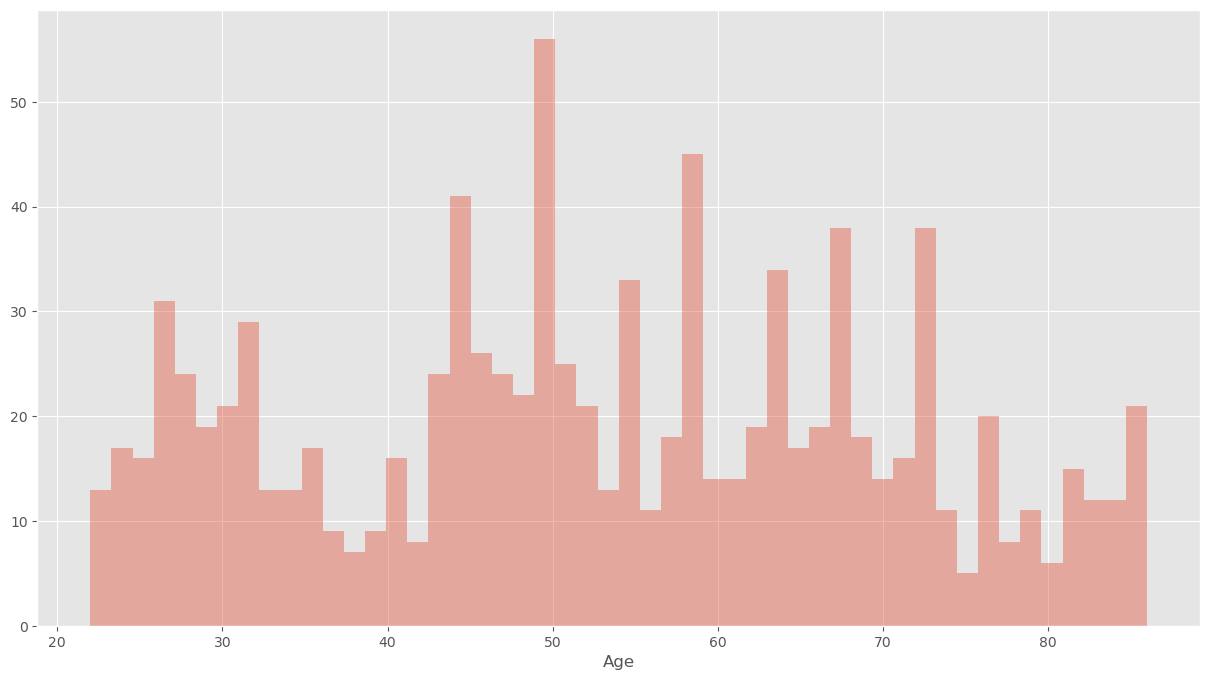

In [27]:
# Viz to find out the Age Distribution
plt.figure(figsize=(15,8))
sns.distplot(new_cust['Age'], kde=False, bins=50)

Looking at the age field there is no descripency in the data



# Creating Age Group Column

In [28]:
new_cust['Age Group'] = new_cust['Age'].apply(lambda x : (math.floor(x/10)+1)*10)

<Axes: xlabel='Age Group'>

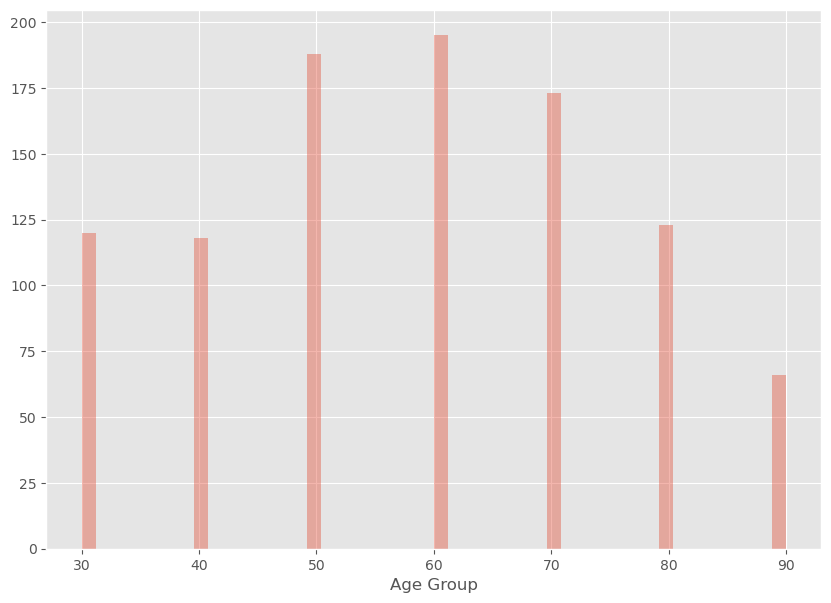

In [29]:
# Viz to find out the Age Group Distribution
plt.figure(figsize=(10,7))
sns.distplot(new_cust['Age Group'], kde=False, bins=50)

The highest number of New Customers are from the Age Group 50-59.

In [30]:
# Job Title

In [31]:
new_cust[new_cust['job_title'].isnull()].head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value,Age,Age Group
15,Dukie,Swire,Male,88,1954-03-31,NaN,Manufacturing,Affluent Customer,N,Yes,5,64 Granby Parkway,2500,NSW,Australia,8,16,1.562500,70,80
25,Rourke,Gillbard,Male,11,1945-08-03,NaN,Property,Mass Customer,N,No,17,75 Cordelia Trail,4817,QLD,Australia,4,26,1.468750,79,80
29,Rhona,De Freyne,Female,45,1960-11-22,NaN,Health,High Net Worth,N,No,8,11184 East Drive,3056,VIC,Australia,10,30,1.460938,63,70
30,Sharron,Claibourn,Female,62,1980-01-26,NaN,Financial Services,High Net Worth,N,Yes,17,555 Hermina Avenue,2280,NSW,Australia,8,30,1.460938,44,50
37,Mitchell,MacCague,Male,58,1979-04-11,NaN,Manufacturing,Mass Customer,N,No,15,240 Acker Avenue,3190,VIC,Australia,8,38,1.437500,45,50


In [32]:
new_cust['job_title'].fillna('Missing', inplace=True, axis=0)

In [33]:
new_cust['job_title'].isnull().sum()

0

Currently there are no missing values for Job Title Column.



In [34]:
# Job Industry Category

In [35]:
new_cust[new_cust['job_industry_category'].isnull()].head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value,Age,Age Group
22,Otis,Ottey,Male,26,1998-02-05,Quality Engineer,NaN,Mass Customer,N,No,3,1562 Merchant Street,4744,QLD,Australia,4,23,1.500000,26,30
23,Tabbatha,Averill,Female,5,1977-12-17,Quality Control Specialist,NaN,Affluent Customer,N,Yes,13,663 8th Parkway,2257,NSW,Australia,8,23,1.500000,46,50
33,Mikel,McNess,Male,71,1981-09-22,Nurse,NaN,Mass Customer,N,No,9,3 Pleasure Drive,4122,QLD,Australia,9,32,1.453125,43,50
36,Farlie,Petford,Male,76,1968-03-25,Recruiting Manager,NaN,High Net Worth,N,No,13,2330 Butternut Trail,2017,NSW,Australia,10,36,1.447656,56,60
43,Corinna,Suggey,Female,52,1966-09-18,Design Engineer,NaN,Affluent Customer,N,No,9,938 Ilene Road,2761,NSW,Australia,8,44,1.421094,58,60


In [36]:
new_cust['job_industry_category'].fillna('Missing', inplace=True, axis=0)

In [37]:
new_cust['job_industry_category'].isnull().sum()

0

Currently there are no Missing values for Job Industry Category column.



In [38]:
new_cust.isnull().sum()

first_name                             0
last_name                              0
gender                                 0
past_3_years_bike_related_purchases    0
DOB                                    0
job_title                              0
job_industry_category                  0
wealth_segment                         0
deceased_indicator                     0
owns_car                               0
tenure                                 0
address                                0
postcode                               0
state                                  0
country                                0
property_valuation                     0
Rank                                   0
Value                                  0
Age                                    0
Age Group                              0
dtype: int64

In [39]:
print("Total records after removing Missing Values: {}".format(new_cust.shape[0]))

Total records after removing Missing Values: 983


In [40]:
# Inconsistency Check in Data

In [41]:
# Gender

In [42]:
new_cust['gender'].value_counts()

gender
Female    513
Male      470
Name: count, dtype: int64

In [43]:
# Wealth Segment

In [44]:
new_cust['wealth_segment'].value_counts()

wealth_segment
Mass Customer        499
High Net Worth       249
Affluent Customer    235
Name: count, dtype: int64

In [45]:
#  Deceased Indicator

In [46]:
new_cust['deceased_indicator'].value_counts()

deceased_indicator
N    983
Name: count, dtype: int64

In [47]:
# Owns a Car

In [48]:
new_cust['owns_car'].value_counts()

owns_car
No     497
Yes    486
Name: count, dtype: int64

In [49]:
# State

In [50]:
new_cust['state'].value_counts()

state
NSW    499
VIC    258
QLD    226
Name: count, dtype: int64

In [51]:
# Country

In [52]:
new_cust['country'].value_counts()

country
Australia    983
Name: count, dtype: int64

In [53]:
# Postcode

In [54]:
new_cust[['postcode', 'state']].drop_duplicates().sort_values('state')

,postcode,state
164,2073,NSW
202,2300,NSW
616,2049,NSW
204,2429,NSW
615,2070,NSW
...,...,...
234,3429,VIC
589,3037,VIC
604,3129,VIC
245,3134,VIC


In [55]:
#  Address

In [56]:
new_cust[['address', 'postcode','state','country']].sort_values('address')

,address,postcode,state,country
721,0 Bay Drive,2750,NSW,Australia
138,0 Dexter Parkway,2380,NSW,Australia
624,0 Emmet Trail,4128,QLD,Australia
300,0 Esker Avenue,4019,QLD,Australia
685,0 Express Lane,2142,NSW,Australia
...,...,...,...,...
308,99 Westend Court,2287,NSW,Australia
336,990 Hoffman Avenue,3029,VIC,Australia
796,99376 Namekagon Street,3101,VIC,Australia
583,9940 Manley Drive,2574,NSW,Australia


In [57]:
# Tenure

In [58]:
new_cust['tenure'].describe()

count    983.000000
mean      11.459817
std        5.006123
min        1.000000
25%        8.000000
50%       11.000000
75%       15.000000
max       22.000000
Name: tenure, dtype: float64

<Axes: xlabel='tenure', ylabel='Density'>

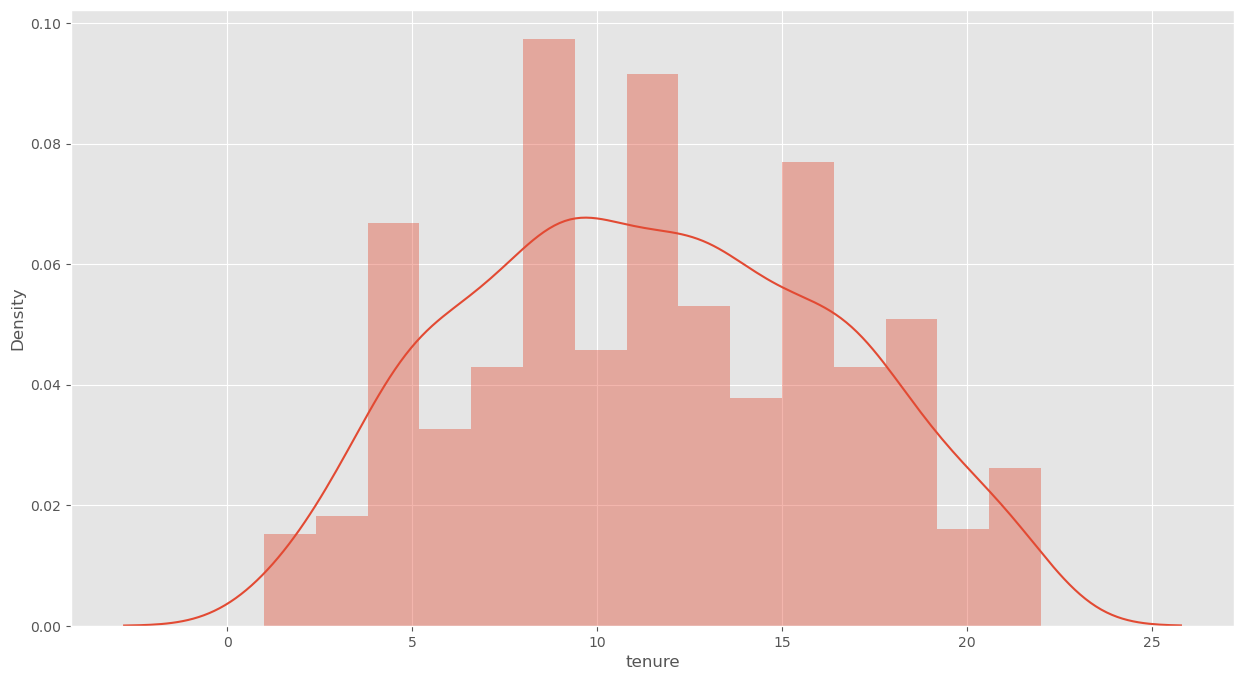

In [59]:
# Distributon of tenure

plt.figure(figsize=(15,8))
sns.distplot(new_cust['tenure'])

# Duplication Checks

We need to ensure that there is no duplication of records in the dataset. This may lead to error in data analysis due to poor data quality. If there are duplicate rows of data then we need to drop such records.
For checking for duplicate records we need to firstly remove the primary key column of the dataset then apply drop_duplicates() function provided by Python.

In [60]:
new_cust_dedupped = new_cust.drop_duplicates()

print("Number of records after removing customer_id (pk), duplicates : {}".format(new_cust_dedupped.shape[0]))
print("Number of records in original dataset : {}".format(new_cust.shape[0]))

Number of records after removing customer_id (pk), duplicates : 983
Number of records in original dataset : 983


Since both the numbers are same. There are no duplicate records in the dataset.



# Exporting the Cleaned New Customers Data Set to csv

In [61]:
# new_cust.to_csv('Data_Cleaned/NewCustomerList_Cleaned.csv', index=False)